<h2>Aikasarja-esimerkkejä</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

<h3>Aikasarjan avaaminen ja valmistelu</h3>

Päivämäärät esiintyvät monenelaisissa formaateissa. Pandas-kirjaston <b>to_datetime()</b>-funktiolla yleisimmät päivämääräformaatit saa muunnettua pandas-kirjaston ymmärtämään formaattiin.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

Aikaleimat täytyy sijoittaa dataframen indeksiin, jotta aikasarjatoiminnoista saa täyden hyödyn.

Aikasarja kannattaa yleensä järjestää vanhimmasta uusimpaan.

In [2]:
#Tiedostojen avaaminen:
elisa = pd.read_csv('http://taanila.fi/elisa.csv', sep = ';', decimal = ',', skiprows=1)
telia = pd.read_csv('http://taanila.fi/telia.csv', sep = ';', decimal = ',', skiprows=1)

#Aikaleimat indeksiin:
elisa.index = pd.to_datetime(elisa['Date'],dayfirst=True)
telia.index = pd.to_datetime(telia['Date'],dayfirst=True)

#Järjestän aikasarjan indeksin mukaan vanhimmasta uusimpaan:
elisa.sort_index(inplace = True)
telia.sort_index(inplace = True)

In [3]:
elisa.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,,
2014-05-05,2014-05-05,21.77,21.79,21.82,21.99,21.65,21.79,21.765,309141,6.728298e+06,1413,NaN
2014-05-06,2014-05-06,22.03,22.04,21.80,22.04,21.80,22.03,21.981,382136,8.399652e+06,1534,NaN
2014-05-07,2014-05-07,22.02,22.04,21.99,22.24,21.94,22.02,22.071,573404,1.266332e+07,2326,NaN
2014-05-08,2014-05-08,22.03,22.05,22.07,22.19,21.90,22.05,22.062,294651,6.500639e+06,1589,NaN
2014-05-09,2014-05-09,21.99,22.00,22.03,22.14,21.84,21.99,21.970,427121,9.383639e+06,2347,NaN


In [4]:
telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,,
2014-05-05,2014-05-05,5.255,5.260,5.250,5.300,5.220,5.255,5.251,539308,2831761.550,577,NaN
2014-05-06,2014-05-06,5.280,5.285,5.245,5.305,5.245,5.285,5.281,860726,4545425.660,796,NaN
2014-05-07,2014-05-07,5.295,5.300,5.285,5.315,5.265,5.295,5.295,797882,4224831.185,751,NaN
2014-05-08,2014-05-08,5.365,5.370,5.295,5.370,5.295,5.365,5.333,1304612,6957506.590,1036,NaN
2014-05-09,2014-05-09,5.350,5.355,5.360,5.390,5.330,5.355,5.360,587175,3147116.220,552,NaN


<h3>Aikasarjan kuvaaminen</h3>

<b>plot()</b> piirtää viivakuvion.

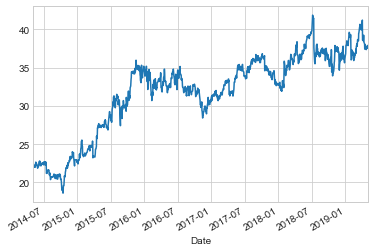

In [5]:
elisa['Closing price'].plot()

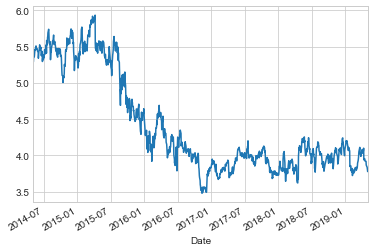

In [6]:
telia['Closing price'].plot()

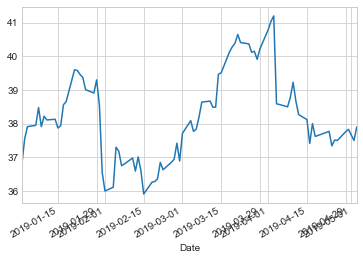

In [7]:
#Vuoden 2019 alusta:
elisa['Closing price']['2019-01':].plot()

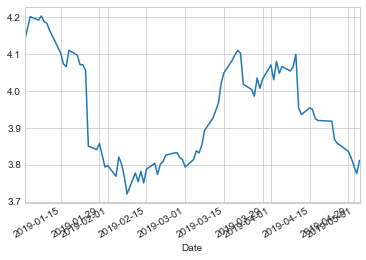

In [8]:
telia['Closing price']['2019-01':].plot()

<h3>Kaksi y-akselia</h3>

Jos haluan vertailla kuviossa kahta suuruusluokaltaan erilaista asiaa, niin käytän kahden y-akselin kuviota.

plot()-funktio on oikotie kuvion luontiin. Taustalla plot() kutsuu <b>subplots()</b>-funktiota. Tässä kutsun itse <b>subplots()</b>-funktiota. Funktio luo figure-olion ja axes-olion. Figure on "kehys", jonka sisälle voin sijoittaa yhden tai useampia axes-olioita.

Toista y-akselia varten luon toisen axes-olion twinx()-funktiolla. 

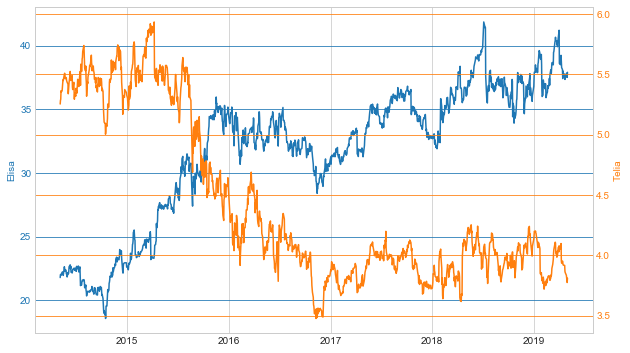

In [9]:
#Luon figure- ja axes-oliot
fig1, ax1 = plt.subplots(figsize = (10, 6))

#Määritän ax1-olion:
color = 'C0'
ax1.set_ylabel('Elisa', color=color)
ax1.plot(elisa['Closing price'], color=color)
ax1.tick_params(axis='y', labelcolor=color, grid_color=color)

#Luon toisen axes-olion, jolla on yhteinen x-akseli ax1-olion kanssa:
ax2 = ax1.twinx()

color = 'C1'
ax2.set_ylabel('Telia', color=color)
ax2.plot(telia['Closing price'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)

[Text(1, 0, '0'),
 Text(1, 0, '10'),
 Text(1, 0, '20'),
 Text(1, 0, '30'),
 Text(1, 0, '40'),
 Text(1, 0, '50')]

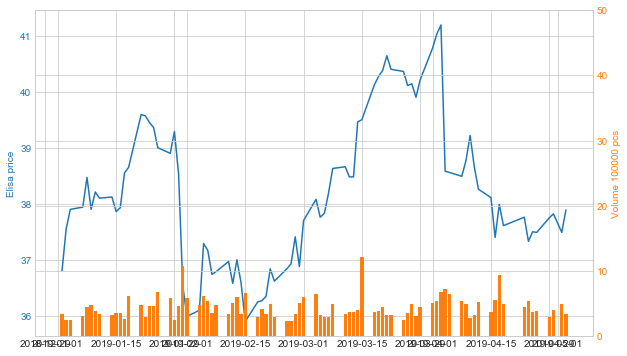

In [10]:
#Seuraavassa vielä hieman lisää vaikeusastetta:

fig2, ax3 = plt.subplots(figsize = (10, 6))

color = 'C0'
ax3.set_ylabel('Elisa price', color=color)
ax3.plot(elisa['2019-01':]['Closing price'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()
color = 'C1'
ax4.set_ylabel('Volume 100000 pcs', color=color)
ax4.bar(elisa['2019-01':].index, elisa['2019-01':]['Total volume'], color=color)
ax4.set_ylim(0,5000000)
ax4.tick_params(axis='y', labelcolor=color)
vals = ax4.get_yticks()
ax4.set_yticklabels(['{:.0f}'.format(y/100000) for y in vals])

<h3>Liukuva keskiarvo</h3>

Esimerkiksi 100 päivän liukuva keskiarvo on viimeisimmän 100 päivän keskiarvo. Liukuva keskiarvo tasoittaa aikasarjan satunnaista vaihtelua.

rolling()-funktiolla voin laskea liukuvia keskiarvoja haluamalleni aikajänteelle. Keskiarvon sijasta voin laskea myös muita tunnuslukuja liukuvasti.

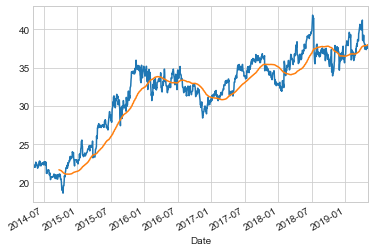

In [11]:
elisa['Closing price'].plot()

elisa['Closing price'].rolling(100).mean().plot()

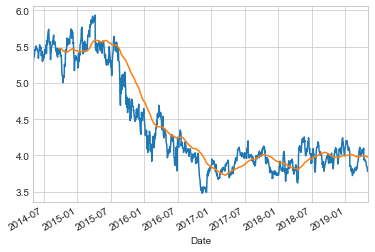

In [12]:
telia['Closing price'].plot()

telia['Closing price'].rolling(100).mean().plot()

<h3>Prosenttimuutokset</h3>

Aikasarjoissa siirrytään usein muuttujan arvojen tarkastelusta muutosprosenttien tarkasteluun.

Pandas-kirjaston pct_change()-funktio laskee prosenttimuutoksen.

In [13]:
elisa['Elisa_Change'] = elisa['Closing price'].pct_change()
elisa.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11,Elisa_Change
Date,,,,,,,,,,,,,
2014-05-05,2014-05-05,21.77,21.79,21.82,21.99,21.65,21.79,21.765,309141,6.728298e+06,1413,NaN,NaN
2014-05-06,2014-05-06,22.03,22.04,21.80,22.04,21.80,22.03,21.981,382136,8.399652e+06,1534,NaN,0.011014
2014-05-07,2014-05-07,22.02,22.04,21.99,22.24,21.94,22.02,22.071,573404,1.266332e+07,2326,NaN,-0.000454
2014-05-08,2014-05-08,22.03,22.05,22.07,22.19,21.90,22.05,22.062,294651,6.500639e+06,1589,NaN,0.001362
2014-05-09,2014-05-09,21.99,22.00,22.03,22.14,21.84,21.99,21.970,427121,9.383639e+06,2347,NaN,-0.002721


In [14]:
telia['Telia_Change'] = telia['Closing price'].pct_change()
telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11,Telia_Change
Date,,,,,,,,,,,,,
2014-05-05,2014-05-05,5.255,5.260,5.250,5.300,5.220,5.255,5.251,539308,2831761.550,577,NaN,NaN
2014-05-06,2014-05-06,5.280,5.285,5.245,5.305,5.245,5.285,5.281,860726,4545425.660,796,NaN,0.005709
2014-05-07,2014-05-07,5.295,5.300,5.285,5.315,5.265,5.295,5.295,797882,4224831.185,751,NaN,0.001892
2014-05-08,2014-05-08,5.365,5.370,5.295,5.370,5.295,5.365,5.333,1304612,6957506.590,1036,NaN,0.013220
2014-05-09,2014-05-09,5.350,5.355,5.360,5.390,5.330,5.355,5.360,587175,3147116.220,552,NaN,-0.001864


<h3>Aikasarjojen yhdistäminen samaan dataframeen</h3>

#pandas-kirjaston <b>concat()</b>-funktio yhdistää useamman datan yhteen dataframeen. 

<b>axis</b>-parametri määrittää ydistetäänkö datat allekkain (oletus) vai vierekkäin (axis=1).

Yhdistettäessä aikasarjoja vierekkäin, concat() yhdistää samaan päivämäärään liittyvät tiedot samalle riville.

In [15]:
muutokset = pd.concat([elisa['Elisa_Change'], telia['Telia_Change']], axis=1)
muutokset.head()

,Elisa_Change,Telia_Change
Date,,
2014-05-05,NaN,NaN
2014-05-06,0.011014,0.005709
2014-05-07,-0.000454,0.001892
2014-05-08,0.001362,0.013220
2014-05-09,-0.002721,-0.001864


<h3>Muutosprosenttien tarkastelua</h3>

[Text(0, 0, '-8 %'),
 Text(0, 0, '-6 %'),
 Text(0, 0, '-4 %'),
 Text(0, 0, '-2 %'),
 Text(0, 0, '0 %'),
 Text(0, 0, '2 %'),
 Text(0, 0, '4 %')]

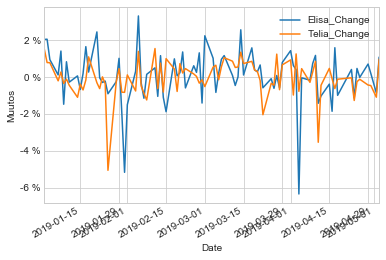

In [16]:
ax5 = muutokset['2019-01':].plot()

ax5.set_ylabel('Muutos')

vals = ax5.get_yticks()
ax5.set_yticklabels(['{:.0f} %'.format(y*100) for y in vals])

In [17]:
#Tunnuslukuja muutosprosenteille:
muutokset.describe()

,Elisa_Change,Telia_Change
count,1256.000000,1256.000000
mean,0.000539,-0.000172
std,0.013987,0.012902
min,-0.092226,-0.079728
25%,-0.006249,-0.006888
50%,0.000644,-0.000499
75%,0.007544,0.007088
max,0.065693,0.083107


In [18]:
#Elisan yli 5 % muutospäivät:
muutokset[(muutokset['Elisa_Change']<-0.05) | (muutokset['Elisa_Change']>0.05)]

,Elisa_Change,Telia_Change
Date,,
2015-03-27,-0.075697,-0.012712
2015-04-16,0.055984,0.006346
2015-08-24,-0.055172,-0.058611
2015-08-25,0.065693,0.047335
2015-09-03,0.057869,0.032323
2015-09-25,0.061796,0.025510
2016-01-22,0.051540,0.037919
2016-04-01,-0.052092,-0.009645
2017-04-07,-0.055222,-0.006459


In [19]:
#Elisan ja Telian muutosprosentit korreloivat positiivisesti:
muutokset.corr()

,Elisa_Change,Telia_Change
Elisa_Change,1.000000,0.496988
Telia_Change,0.496988,1.000000


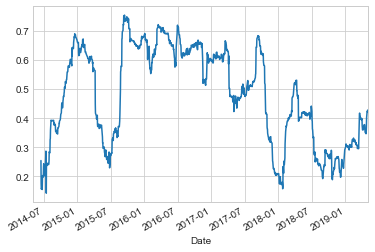

In [20]:
#Liukuva korrelaatio kertoo miten Elisan ja Telian muutosprosentit korreloivat eri aikoina:
korrelaatio=muutokset['Elisa_Change'].rolling(100, min_periods=30).corr(muutokset['Telia_Change'])
korrelaatio.plot()

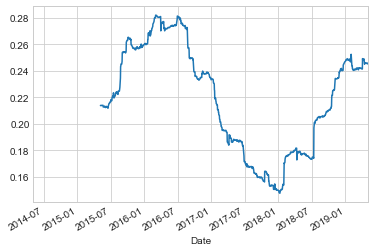

In [21]:
#Volatiliteetti kertoo osakkeeseen sisältyvästä riskistä.
(muutokset['Elisa_Change'].rolling(252).std()*(252**0.5)).plot()

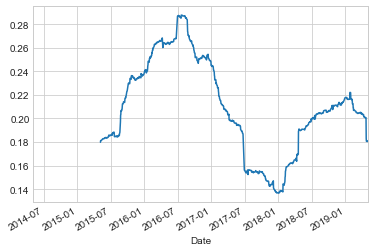

In [22]:
(muutokset['Telia_Change'].rolling(252).std()*(252**0.5)).plot()

<h3>Onko viikonpäivällä yhteyttä päivätuottoihin?</h3>

Indeksin päivämääristä pääsen viikonpäivään <b>weekday</b>-funktiolla.

In [23]:
#Viikonpäivät omaan sarakkeeseen (0=maanantai)
muutokset['Weekday'] = muutokset.index.weekday

muutokset.groupby('Weekday')['Elisa_Change'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,249.0,0.001432,0.013192,-0.055172,-0.004443,0.000849,0.007492,0.057805
1,255.0,0.000657,0.012629,-0.036921,-0.007492,0.000830,0.007167,0.065693
2,255.0,0.000291,0.012972,-0.053899,-0.005726,0.000000,0.007217,0.058061
3,251.0,0.000456,0.014823,-0.074751,-0.006554,0.000907,0.008114,0.057869
4,246.0,-0.000147,0.016143,-0.092226,-0.006985,0.000803,0.007490,0.061796


In [24]:
muutokset.groupby('Weekday')['Telia_Change'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,249.0,-0.000070,0.013725,-0.079728,-0.006598,-0.001045,0.007269,0.039216
1,255.0,-0.000191,0.012014,-0.037550,-0.006719,-0.000847,0.006112,0.048600
2,255.0,0.000289,0.011690,-0.044934,-0.006170,0.000000,0.007634,0.042407
3,251.0,-0.000822,0.013159,-0.066554,-0.007971,-0.000496,0.006667,0.039604
4,246.0,-0.000070,0.013903,-0.050542,-0.007174,0.000000,0.007112,0.083107
